# mutation rate

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [104]:
# np.random.seed(666)
import pandas as pd
from project_package.generate_pop import SymPop
from project_package.generate_pop import generate_initial_pop_unlinked
from project_package.run_model import update_pop
import tracemalloc
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [98]:
# np.random.seed(666)

verbose=False

df=pd.DataFrame([],columns=['exec_time','mem_needed','mutation_rate','gen','pop_size','richness','mean_fitness','Fst','heterogeneity'])

mutation_rate=0.005
growth_factor=1.01
fitnesses=[0.95,0.9] # allele_id:fitness
abundances=[30,70] # allele_id:abundance

runtime=200

POP=generate_initial_pop_unlinked(fitnesses,abundances)


for mutation_rate in [0,mutation_rate]:
    print( mutation_rate)
    for trial in range(20): # 50 trials
        G=POP.copy()
        t=0
        

        while True:
            t+=1
            
            tracemalloc.start()
            start_time = time.time()

            G_plus1=update_pop(G,mutation_rate,growth_factor=growth_factor)
            # G_plus1=remove_empty_leaves_and_rescale_edges(G_plus1)
            
            mem_needed=sum(tracemalloc.get_traced_memory())
            exec_time=time.time() - start_time
            
            SP=SymPop(G_plus1)
            G=SP.G
            
            # if t%1==0:
            df.loc[-1] = [exec_time,mem_needed,mutation_rate,t,SP.pop_size,SP.richness,SP.mean_fitness,SP.Fst,SP.heterogeneity]  # adding a row
            df.index = df.index + 1  # shifting index
            
            # pd.concat([df1, df4], ignore_index=True, sort=False)
            if verbose>0:
                if t%verbose==0:
                    print(t)
            
            if t>runtime:
                break   
    
df[:]

0
0.005


exec_time   mem_needed  mutation_rate    gen  pop_size  richness  \
8039   0.000279  360741393.0          0.000    1.0     101.0       2.0   
8038   0.000331  360744969.0          0.000    2.0     102.0       2.0   
8037   0.000274  360748753.0          0.000    3.0     103.0       2.0   
8036   0.000427  360752897.0          0.000    4.0     104.0       2.0   
8035   0.000333  360757041.0          0.000    5.0     105.0       2.0   
...         ...          ...            ...    ...       ...       ...   
4      0.005766  355887581.0          0.005  197.0     454.0      12.0   
3      0.005448  356103373.0          0.005  198.0     458.0      14.0   
2      0.005585  356322893.0          0.005  199.0     462.0      14.0   
1      0.005059  356436445.0          0.005  200.0     466.0      15.0   
0      0.004594  356659245.0          0.005  201.0     470.0      11.0   

      mean_fitness       Fst  heterogeneity  
8039      0.925000  0.372512            0.0  
8038      0.925000  0.398308            0.0  
8037      0.925000  0.435479            0.0  
8036      0.925000  0.468750            0.0  
8035      0.925000  0.492336            0.0  
...            ...       ...            ...  
4         0.936721  0.451396          164.0  
3         0.936810  0.446416          167.0  
2         0.934849  0.466652          169.0  
1         0.936637  0.500967          171.0  
0         0.936261  0.498515          171.0  

[8040 rows x 9 columns]

KeyboardInterrupt: 

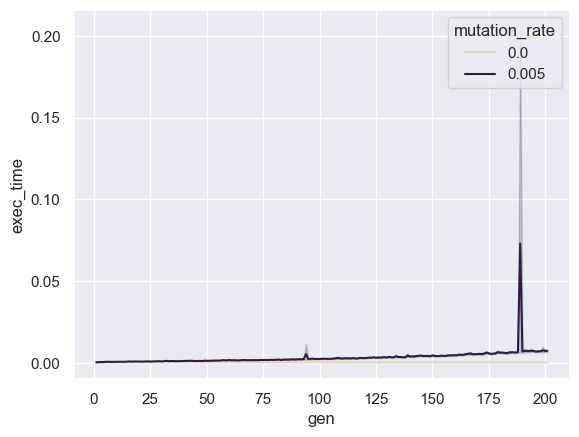

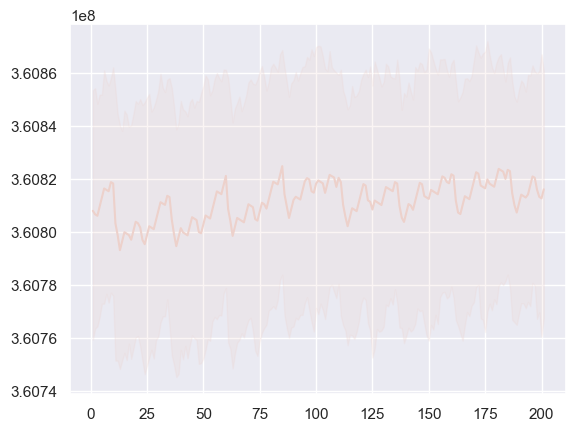

In [112]:
import seaborn as sns

for var in ['exec_time','mem_needed','pop_size','richness']:
    
    plt.figure()
    # Plot the responses for different events and regions
    sns.lineplot(x="gen", y=var,
                 hue="mutation_rate", 
                 data=df)



<Axes: xlabel='richness', ylabel='mem_needed'>

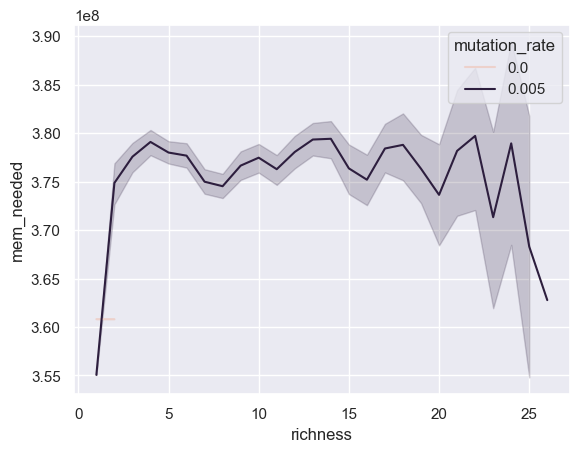

In [114]:
sns.lineplot(x="richness", y='mem_needed',
                 hue="mutation_rate", 
                 data=df)

In [ ]:
import seaborn as sns

df_diversity=df[['gen','mutation_rate','exec_time','mem_needed','pop_size','richness']].melt(id_vars=['gen','mutation_rate'])

g = sns.FacetGrid(df_diversity, col="variable", hue='mutation_rate',sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x="gen",y='value')

